Mohammad Labib Husain 

2101989

C2 Ilmu Komputer


#Pra Proses

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import joblib
import pickle

In [2]:
#import dataset
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTF4lF_IlNIIymnDnLDZSoUoMKN0lTVCZxizQItM7O3qGt-Nug6q4OdudapGirqCa_TShqhS_2Exipp/pub?gid=923303531&single=true&output=csv')

In [3]:
#import data set kedua
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT2EU7V3yZ5AnJhtj8IdnRgHnE0mfRgbwyCYmEN5_CXBZfzNV9rL5nvu-ur-0fcH2SfPMFWReihmycw/pub?gid=126117787&single=true&output=csv')

In [4]:
df

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,4/1/2012,4/3/2012,186,m,denim,25,69.90,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,0
1,2,4/1/2012,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
2,3,4/1/2012,4/3/2012,71,9+,curry,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
3,4,4/2/2012,?,22,m,green,14,39.90,808,Mrs,11/9/1959,Saxony,1/4/2012,0
4,5,4/2/2012,12/31/1990,151,39,black,53,29.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481087,481088,3/31/2013,4/9/2013,2561,39+,blue,1,139.90,7032,Mr,12/17/1962,Lower Saxony,3/12/2011,1
481088,481089,3/31/2013,4/2/2013,2669,39,grey,18,130.00,86610,Mrs,?,Berlin,3/24/2012,0
481089,481090,3/31/2013,12/31/1990,2458,XXL,black,5,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0
481090,481091,3/31/2013,12/31/1990,2659,XXL,black,49,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0


In [5]:
df2

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
0,1,2013-04-01,2013-04-03,2347,43,magenta,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
1,2,2013-04-01,2013-04-03,2741,43,grey,1,99.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
2,3,2013-04-01,2013-04-03,2514,9,ecru,19,79.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
3,4,2013-04-01,2013-05-06,2347,42,brown,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
4,5,2013-04-01,?,2690,43,grey,1,119.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50073,50074,2013-04-29,2013-05-03,2342,M,terracotta,5,69.9,91920,Mrs,1962-03-08,Bavaria,2013-04-29
50074,50075,2013-04-29,2013-05-03,2505,M,terracotta,5,64.9,91920,Mrs,1962-03-08,Bavaria,2013-04-29
50075,50076,2013-04-28,2013-05-02,2470,XL,white,5,79.9,85095,Mrs,1950-02-14,Berlin,2013-03-24
50076,50077,2013-04-28,?,2452,L,white,5,59.9,91922,Mrs,1969-11-27,Brandenburg,2013-04-28


In [6]:
#Menampilkan nilai yang Null
df.isnull().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
returnShipment    0
dtype: int64

In [7]:
#Menampilkan nilai unik
df.nunique()

orderItemID       481092
orderDate            365
deliveryDate         328
itemID              3007
size                 122
color                 88
manufacturerID       165
price                379
customerID         59754
salutation             5
dateOfBirth        14309
state                 16
creationDate         775
returnShipment         2
dtype: int64

In [8]:
#Menampilkan yang unik dari color
df['color'].unique()

array(['denim', 'ocher', 'curry', 'green', 'black', 'brown', 'red',
       'mocca', 'anthracite', 'olive', 'petrol', 'blue', 'grey', 'beige',
       'ecru', 'turquoise', 'magenta', 'purple', 'pink', 'khaki', 'navy',
       'habana', 'silver', 'white', 'nature', 'stained', 'orange',
       'azure', 'apricot', 'mango', 'berry', 'ash', 'hibiscus', 'fuchsia',
       'blau', 'dark denim', 'mint', 'ivory', 'yellow', 'bordeaux',
       'pallid', 'ancient', 'baltic blue', 'almond', 'aquamarine',
       'brwon', 'aubergine', 'aqua', 'dark garnet', 'dark grey',
       'avocado', 'creme', 'champagner', 'cortina mocca',
       'currant purple', 'cognac', 'aviator', 'gold', 'ebony',
       'cobalt blue', 'kanel', 'curled', 'caramel', 'antique pink',
       'darkblue', 'copper coin', 'terracotta', 'basalt', 'amethyst',
       'coral', 'jade', 'opal', 'striped', 'mahagoni', 'floral',
       'dark navy', 'dark oliv', '?', 'vanille', 'ingwer', 'iron',
       'graphite', 'leopard', 'oliv', 'bronze', 'cr

In [9]:
#Menampilkan yang tanda tanya
df.loc[df["color"]=='?']

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
141039,141040,7/23/2012,7/24/2012,1904,unsized,?,125,0.0,21343,Mrs,?,North Rhine-Westphalia,5/20/2012,0
148001,148002,8/2/2012,8/24/2012,2103,unsized,?,125,0.0,20016,Mrs,12/22/1965,Bavaria,2/16/2011,0
150555,150556,8/4/2012,8/28/2012,2108,unsized,?,125,25.0,39327,Mrs,9/4/1972,Lower Saxony,9/24/2011,0
150749,150750,8/4/2012,8/28/2012,2108,unsized,?,125,25.0,39374,Mrs,7/1/1971,North Rhine-Westphalia,2/23/2012,0
154052,154053,8/6/2012,8/29/2012,2108,unsized,?,125,25.0,39848,Mrs,11/24/1958,North Rhine-Westphalia,2/17/2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290835,290836,11/29/2012,11/30/2012,2103,unsized,?,125,0.0,33472,Mrs,11/14/1964,Bremen,6/29/2012,0
295640,295641,12/6/2012,?,1904,unsized,?,125,0.0,60704,Mrs,?,Bavaria,11/1/2012,0
298168,298169,12/10/2012,12/20/2012,2103,unsized,?,125,0.0,64824,Mrs,6/20/1965,Hesse,2/16/2011,0
298816,298817,12/11/2012,12/17/2012,2103,unsized,?,125,0.0,8563,Mrs,9/23/1959,Hamburg,5/6/2012,0


In [10]:
#Mengubah (?) mejadi Null
df.loc[(df.color=='?'), "color"] = np.nan

In [11]:
#Menampilkan data yang null dari 1 atribut
df["color"].isnull().value_counts()

False    480949
True        143
Name: color, dtype: int64

In [12]:
#Mengetahui jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderItemID     481092 non-null  int64  
 1   orderDate       481092 non-null  object 
 2   deliveryDate    481092 non-null  object 
 3   itemID          481092 non-null  int64  
 4   size            481092 non-null  object 
 5   color           480949 non-null  object 
 6   manufacturerID  481092 non-null  int64  
 7   price           481092 non-null  float64
 8   customerID      481092 non-null  int64  
 9   salutation      481092 non-null  object 
 10  dateOfBirth     481092 non-null  object 
 11  state           481092 non-null  object 
 12  creationDate    481092 non-null  object 
 13  returnShipment  481092 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 51.4+ MB


In [13]:
df.describe()

,orderItemID,itemID,manufacturerID,price,customerID,returnShipment
count,481092.00000,481092.000000,481092.000000,481092.000000,481092.000000,481092.000000
mean,240546.50000,1399.764779,29.726109,70.440229,33369.968376,0.482425
std,138879.44219,931.075227,30.064934,45.502854,23972.075259,0.499692
min,1.00000,1.000000,1.000000,0.000000,6.000000,0.000000
25%,120273.75000,332.000000,5.000000,34.900000,12891.000000,0.000000
50%,240546.50000,1569.000000,21.000000,59.900000,28426.000000,0.000000
75%,360819.25000,2342.000000,43.000000,89.900000,51141.000000,1.000000
max,481092.00000,3071.000000,166.000000,999.000000,86611.000000,1.000000


In [14]:
#Mengubah Jenis variable data
df["salutation"] = df["salutation"].astype("category")

In [15]:
#copy dataset
df3 = df.copy()

In [16]:
df3


,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,4/1/2012,4/3/2012,186,m,denim,25,69.90,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,0
1,2,4/1/2012,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
2,3,4/1/2012,4/3/2012,71,9+,curry,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
3,4,4/2/2012,?,22,m,green,14,39.90,808,Mrs,11/9/1959,Saxony,1/4/2012,0
4,5,4/2/2012,12/31/1990,151,39,black,53,29.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481087,481088,3/31/2013,4/9/2013,2561,39+,blue,1,139.90,7032,Mr,12/17/1962,Lower Saxony,3/12/2011,1
481088,481089,3/31/2013,4/2/2013,2669,39,grey,18,130.00,86610,Mrs,?,Berlin,3/24/2012,0
481089,481090,3/31/2013,12/31/1990,2458,XXL,black,5,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0
481090,481091,3/31/2013,12/31/1990,2659,XXL,black,49,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0


In [17]:
#Mengubah tipedata menjadi datetime
df.orderDate = pd.to_datetime(df.orderDate)

In [18]:
df

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,4/3/2012,186,m,denim,25,69.90,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,0
1,2,2012-04-01,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
2,3,2012-04-01,4/3/2012,71,9+,curry,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
3,4,2012-04-02,?,22,m,green,14,39.90,808,Mrs,11/9/1959,Saxony,1/4/2012,0
4,5,2012-04-02,12/31/1990,151,39,black,53,29.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481087,481088,2013-03-31,4/9/2013,2561,39+,blue,1,139.90,7032,Mr,12/17/1962,Lower Saxony,3/12/2011,1
481088,481089,2013-03-31,4/2/2013,2669,39,grey,18,130.00,86610,Mrs,?,Berlin,3/24/2012,0
481089,481090,2013-03-31,12/31/1990,2458,XXL,black,5,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0
481090,481091,2013-03-31,12/31/1990,2659,XXL,black,49,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0


In [20]:
#Mengambil tahun dan bulan
df['Tahun']=pd.to_datetime(df['orderDate']).dt.year
df['Bulan']=pd.to_datetime(df['orderDate']).dt.month

In [21]:
#Mengubah yang white menjadi putih
df.loc[(df.color=='white'), "color"] = "putih"

In [22]:
#Mengisi nilai Null menjadi biru2
df['color'].fillna('biru2', inplace = True)

In [23]:
#Menghapus 1 kolom
df3 = df3.drop(['color'],axis=1)

#EDA

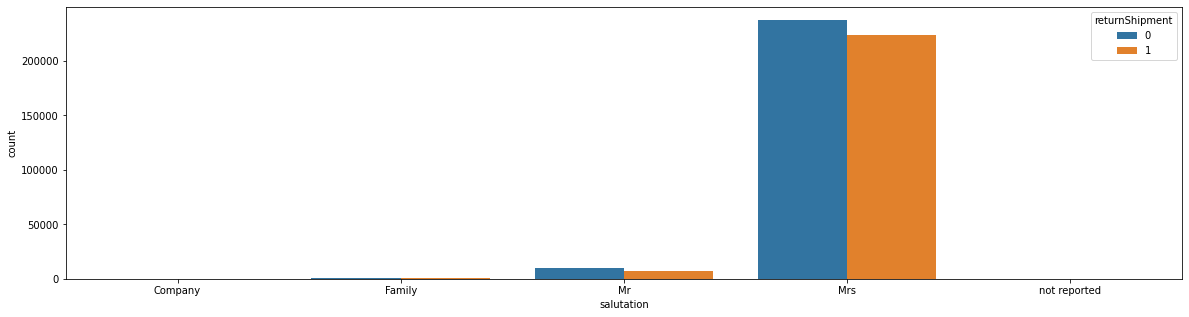

In [25]:
#ini untuk membandingkan buat tipe kategori
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax,x='salutation', hue="returnShipment", data=df)

In [26]:
df


,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,Tahun,Bulan
0,1,2012-04-01,4/3/2012,186,m,denim,25,69.90,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,0,2012,4
1,2,2012-04-01,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1,2012,4
2,3,2012-04-01,4/3/2012,71,9+,curry,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1,2012,4
3,4,2012-04-02,?,22,m,green,14,39.90,808,Mrs,11/9/1959,Saxony,1/4/2012,0,2012,4
4,5,2012-04-02,12/31/1990,151,39,black,53,29.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0,2012,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481087,481088,2013-03-31,4/9/2013,2561,39+,blue,1,139.90,7032,Mr,12/17/1962,Lower Saxony,3/12/2011,1,2013,3
481088,481089,2013-03-31,4/2/2013,2669,39,grey,18,130.00,86610,Mrs,?,Berlin,3/24/2012,0,2013,3
481089,481090,2013-03-31,12/31/1990,2458,XXL,black,5,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0,2013,3
481090,481091,2013-03-31,12/31/1990,2659,XXL,black,49,99.90,86611,Mr,5/16/1973,Berlin,3/31/2013,0,2013,3


Text(0.5, 0.98, 'Umur, Gender dan Tuhan')

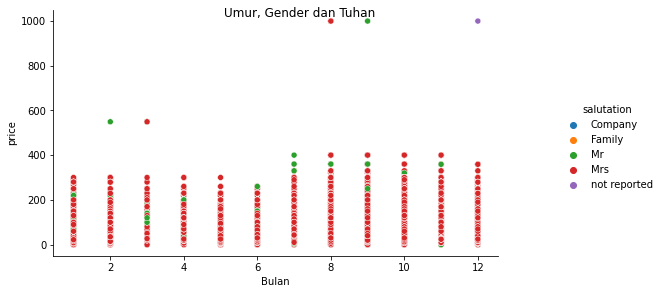

In [28]:
c = sns.relplot(x="Bulan", y="price", hue="salutation", data=df)
c.fig.set_size_inches(10,4) # atur ukuran chart
c.fig.suptitle("Umur, Gender dan Tuhan") #judul

#Klasifikasi

In [29]:
df_temp = df.copy()

In [ ]:
df_temp = df_temp.drop(['orderItemID','orderDate', 'deliveryDate', 'dateOfBirth','creationDate'],axis=1)

In [ ]:
df_temp.info()

In [ ]:
df_temp = pd.get_dummies(data=df_temp, columns=['size','salutation','state'])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_temp.returnShipment)
Y = le.transform(df_temp.returnShipment)

In [ ]:
X = df_temp.drop("returnShipment",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective = "multi:softprob", num_class = 4, eval_metric =
"mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01,
n_estimators = 10, nthread=-1)
# num_class adalah jumlah kelas
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))